<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations_Revised/blob/main/Expectated_Time_Exp_and_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
np.random.seed(1)

In [30]:
def ET_m(m, lamb, delta):
    def T_m(m, lamb, delta):
        sum_of_y = 0
        y = np.random.exponential(delta)
        sum_of_x = np.sum(np.random.exponential(lamb, m))
        while sum_of_x > y:
            sum_of_y = sum_of_y + y
            sum_of_x = np.sum(np.random.exponential(lamb, m))
            y = np.random.exponential(delta)
        return(sum_of_y + sum_of_x)

    ET = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, lamb, delta)
        ET[i] = T_0/iter
    return(ET)

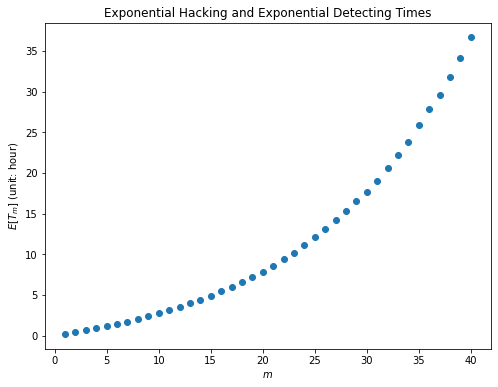

In [31]:
m = 40
lamb = 0.2
delta = 3
ET_m = ET_m(m, lamb, delta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Exponential Hacking and Exponential Detecting Times')
plt.show()

## U shape

In [38]:
R = [.3*np.exp(np.sqrt(c)) for c in range(1, m+1)] # U Shape
C_2 = [c ** 0.1 for c in range(1, m+1)]
C_1 = [c for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = R[j] - C_2[j] - C_1[j]/(1/delta)
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))

40 45.98674799953591


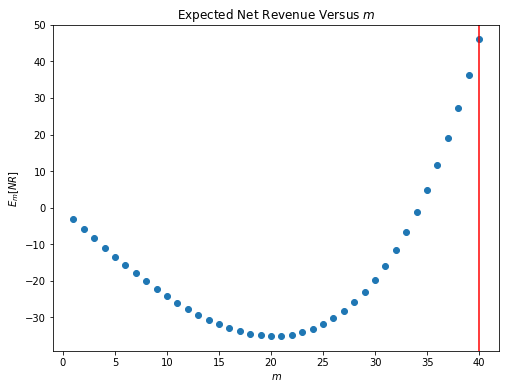

In [39]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()

## Increasing

In [40]:
R = [2*np.exp(np.sqrt(c)) for c in range(1, m+1)] # Increasing
C_2 = [c ** 0.1 for c in range(1, m+1)]
C_1 = [c for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = R[j] - C_2[j] - C_1[j]/(1/delta)
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))

40 994.7730314445937


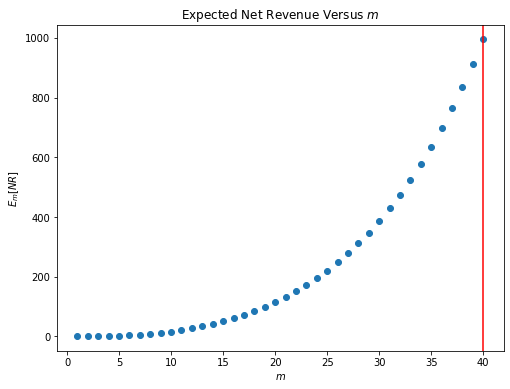

In [41]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()

## Converse U shape

In [81]:
R = [np.sqrt(c)*25 for c in range(1, m+1)]
C_2 = [c ** 0.1 for c in range(1, m+1)]
C_1 = [c for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = R[j] - C_2[j] - C_1[j]/(1/delta)
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))

17 50.750108965553


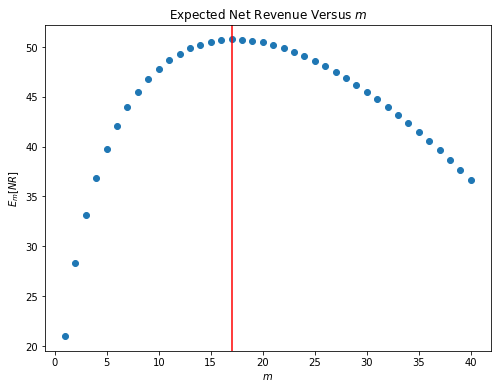

In [82]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()